<h1>Complete Analysis of the ECOMM DATA.xlsx By ARMAN RAWAL</h1>

<h3>Importing the Data / Importing the libraries</h3>

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

<h4>Importing the Data</h4>

<h5>Importing the Order Worksheet from Ecomm Data</h5>

Some Containers which I have made to store data Its Usefull for understanding that's the reasons. I already gonna mention over here.

**df = Order worksheet data**

**ds = Returns worksheet data**

**dc = People worksheet data**

**fsc = FULL Data (ORDER>RETURN>PEOPLE)**

In [8]:
df = pd.read_excel('ECOMM DATA.xlsx', sheet_name='Order')

In [9]:
df.head(1)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.65,7,0.0,762.1845,933.57,Critical


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   City            51290 non-null  object        
 9   State           51290 non-null  object        
 10  Country         51290 non-null  object        
 11  Postal Code     9994 non-null   float64       
 12  Market          51290 non-null  object        
 13  Region          51290 non-null  object        
 14  Product ID      51290 non-null  object        
 15  Ca

**Importing the Returns worksheet from ECOMM DATA.xlsx**

In [10]:
ds = pd.read_excel('ECOMM DATA.xlsx', sheet_name='Returns')

**Importing the People worksheet from ECOMM DATA.xlsx**

In [11]:
dc = pd.read_excel('ECOMM DATA.xlsx', sheet_name='People')

In [12]:
dc.head()

,Person,Region
0,Anna Andreadi,Central
1,Chuck Magee,South
2,Kelly Williams,East
3,Matt Collister,West
4,Deborah Brumfield,Africa


In [13]:
ds.head()

,Returned,Order ID,Market
0,Yes,MX-2013-168137,LATAM
1,Yes,US-2011-165316,LATAM
2,Yes,ES-2013-1525878,EU
3,Yes,CA-2013-118311,United States
4,Yes,ES-2011-1276768,EU


<h3>Starting of Data cleaning and Modeling</h3>

**Lets consider the heatmap to identify the null values**

<Axes: >

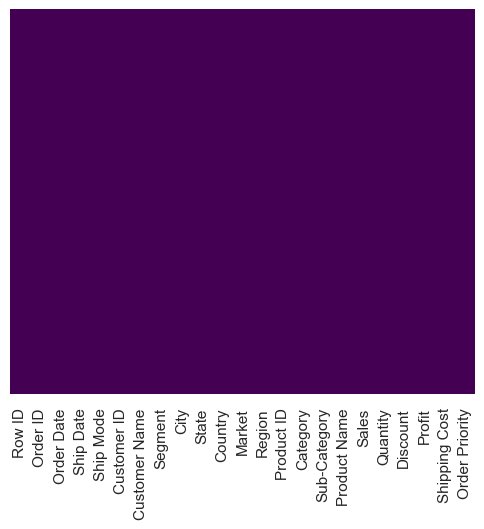

In [19]:
sns.set(rc={'figure.figsize':(6,5)})
sns.heatmap(df.isnull(),yticklabels = False, cbar = False, cmap = 'viridis')

In [15]:
df.shape

(51290, 24)

**There Has been enormous no.of postal code missing inside the postal code column so its better to drop it.**

In [16]:
df.drop('Postal Code', axis = 1, inplace = True)

**Lets check again by using  heatmap or some other options**

In [17]:

# lets check again
pd.isnull(df).sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
City              0
State             0
Country           0
Market            0
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Discount          0
Profit            0
Shipping Cost     0
Order Priority    0
dtype: int64

<Axes: >

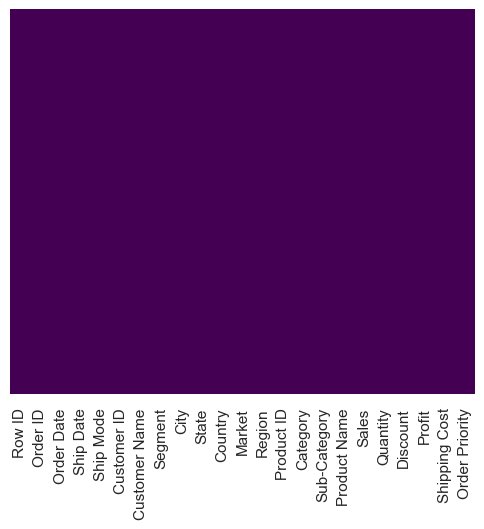

In [20]:
sns.heatmap(df.isnull(),yticklabels = False, cbar = False, cmap = 'viridis')

**Now Everything is good with Order worksheet. Now lets check other of data sheets**

In [21]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1173 entries, 0 to 1172
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Returned  1173 non-null   object
 1   Order ID  1173 non-null   object
 2   Market    1173 non-null   object
dtypes: object(3)
memory usage: 27.6+ KB


**Here is no null values in Returns worksheet**

In [22]:
dc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Person  13 non-null     object
 1   Region  13 non-null     object
dtypes: object(2)
memory usage: 340.0+ bytes


**People worksheet also not having any null values**

**lets start to identify is there any relationship among these three sheets.(df,ds and dc)**

In [23]:
dc.head(1)

,Person,Region
0,Anna Andreadi,Central


Lets change the column name of Person to Customer ID because to make relationship between them

In [24]:
dc.rename(columns= {'Person' : 'Customer ID'}, inplace = True)

In [25]:
#Recheck 
dc.head()

,Customer ID,Region
0,Anna Andreadi,Central
1,Chuck Magee,South
2,Kelly Williams,East
3,Matt Collister,West
4,Deborah Brumfield,Africa


In [26]:
# Perform inner join between df1 and df2 on common key
merged_df_dc = pd.merge(df, ds, on='Order ID', how='inner')

# Perform inner join between merged_df and df3 on common key
merged_df_ds = pd.merge(df, dc, on= 'Customer ID' , how = 'inner')

In [27]:
merged_df_dc.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Returned,Market_y
0,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.765,923.63,Critical,Yes,APAC
1,26339,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,Copiers,"Brother Fax and Copier, Laser",344.682,2,0.1,34.422,65.35,Critical,Yes,APAC
2,26340,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,Storage,"Rogers Folders, Wire Frame",133.920,5,0.1,-6.030,41.64,Critical,Yes,APAC
3,26342,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,Accessories,"Enermax Flash Drive, Erganomic",70.794,2,0.1,25.134,10.48,Critical,Yes,APAC
4,12069,ES-2014-1651774,2014-09-08,2014-09-14,Standard Class,PJ-18835,Patrick Jones,Corporate,Prato,Tuscany,...,Appliances,"Hoover Stove, Red",7958.580,14,0.0,3979.080,778.32,Low,Yes,EU


In [30]:
merged_df_dc.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Returned,Market_y
0,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.765,923.63,Critical,Yes,APAC
1,26339,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,Copiers,"Brother Fax and Copier, Laser",344.682,2,0.1,34.422,65.35,Critical,Yes,APAC
2,26340,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,Storage,"Rogers Folders, Wire Frame",133.920,5,0.1,-6.030,41.64,Critical,Yes,APAC
3,26342,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,Accessories,"Enermax Flash Drive, Erganomic",70.794,2,0.1,25.134,10.48,Critical,Yes,APAC
4,12069,ES-2014-1651774,2014-09-08,2014-09-14,Standard Class,PJ-18835,Patrick Jones,Corporate,Prato,Tuscany,...,Appliances,"Hoover Stove, Red",7958.580,14,0.0,3979.080,778.32,Low,Yes,EU


**So, definitely there is some relationship among them. However, Some data might be duplicated also so we have to solve this issue although first**

**Let's merge them first and later on solve the duplication issue**

In [31]:
#loading all three data into a Single Data Frame
Final_data_df_ds = pd.merge(df,ds, on = 'Order ID' , how = 'left')

Final_full_data = pd.merge(Final_data_df_ds,dc,on = 'Customer ID' , how = 'left')

In [32]:
fsc = Final_full_data

In [33]:
fsc.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Returned,Market_y,Region_y
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical,NaN,NaN,NaN
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical,Yes,APAC,NaN
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium,NaN,NaN,NaN
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium,NaN,NaN,NaN
4,47221,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical,NaN,NaN,NaN


In [34]:
fsc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51295 entries, 0 to 51294
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51295 non-null  int64         
 1   Order ID        51295 non-null  object        
 2   Order Date      51295 non-null  datetime64[ns]
 3   Ship Date       51295 non-null  datetime64[ns]
 4   Ship Mode       51295 non-null  object        
 5   Customer ID     51295 non-null  object        
 6   Customer Name   51295 non-null  object        
 7   Segment         51295 non-null  object        
 8   City            51295 non-null  object        
 9   State           51295 non-null  object        
 10  Country         51295 non-null  object        
 11  Market_x        51295 non-null  object        
 12  Region_x        51295 non-null  object        
 13  Product ID      51295 non-null  object        
 14  Category        51295 non-null  object        
 15  Su

In [35]:
pd.isnull(fsc).sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Market_x              0
Region_x              0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
Returned          48240
Market_y          48240
Region_y          51295
dtype: int64

**I have identified that Row ID column is just a integers form 1 - 51295. Although, Lets sort it first**

In [36]:
Sorted_Row = fsc.sort_values(by = 'Row ID')

In [37]:
Sorted_Row.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Returned,Market_y,Region_y
46167,1,MX-2014-143658,2014-10-02,2014-10-06,Standard Class,SC-20575,Sonia Cooley,Consumer,Mexico City,Distrito Federal,...,"Hon File Folder Labels, Adjustable",13.08,3,0.0,4.56,1.033,Medium,NaN,NaN,NaN
19160,2,MX-2012-155047,2012-10-15,2012-10-20,Standard Class,KW-16570,Kelly Williams,Consumer,Dos Quebradas,Risaralda,...,"Tenex Clock, Durable",252.16,8,0.0,90.72,13.449,Medium,NaN,NaN,NaN
23057,3,MX-2012-155047,2012-10-15,2012-10-20,Standard Class,KW-16570,Kelly Williams,Consumer,Dos Quebradas,Risaralda,...,"Ikea 3-Shelf Cabinet, Mobile",193.28,2,0.0,54.08,9.627,Medium,NaN,NaN,NaN
44214,4,MX-2012-155047,2012-10-15,2012-10-20,Standard Class,KW-16570,Kelly Williams,Consumer,Dos Quebradas,Risaralda,...,"Cardinal Binder, Clear",35.44,4,0.0,4.96,1.371,Medium,NaN,NaN,NaN
34386,5,MX-2012-155047,2012-10-15,2012-10-20,Standard Class,KW-16570,Kelly Williams,Consumer,Dos Quebradas,Risaralda,...,"Sanford Canvas, Water Color",71.60,2,0.0,11.44,3.787,Medium,NaN,NaN,NaN


**I was right. Now, Let's drop the Row ID column Because we don't need it**

In [38]:
fsc.drop(['Row ID'], axis = 1, inplace = True)

In [39]:
fsc.head(1)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,...,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Returned,Market_y,Region_y
0,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,United States,...,Plantronics CS510 - Over-the-Head monaural Wir...,2309.65,7,0.0,762.1845,933.57,Critical,NaN,NaN,NaN


**Now let's Counter the Duplicate values with the order ID**

In [40]:
duplicate_rows = fsc.duplicated(subset=['Order ID','Order Date','Ship Date'])
duplicate_rows_fsc = fsc[duplicate_rows]
duplicate_rows_fsc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25541 entries, 53 to 51293
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order ID        25541 non-null  object        
 1   Order Date      25541 non-null  datetime64[ns]
 2   Ship Date       25541 non-null  datetime64[ns]
 3   Ship Mode       25541 non-null  object        
 4   Customer ID     25541 non-null  object        
 5   Customer Name   25541 non-null  object        
 6   Segment         25541 non-null  object        
 7   City            25541 non-null  object        
 8   State           25541 non-null  object        
 9   Country         25541 non-null  object        
 10  Market_x        25541 non-null  object        
 11  Region_x        25541 non-null  object        
 12  Product ID      25541 non-null  object        
 13  Category        25541 non-null  object        
 14  Sub-Category    25541 non-null  object        
 15  Produc

In [41]:
fsc.duplicated(subset=['Order ID']).sum()

26260

**So, hence there are almost 26260 entries and duplicates let delete them, But the thing is that I'm not sure about deleting duplicate basis on the ORDER ID let's consider other columns also like Product ID and Category and SubCategory. If these column's values are also same and delete them**

**Before deleting the duplicate value let Check shape of the fsc**

In [42]:
fsc.shape

(51295, 25)

In [43]:
fsc.drop_duplicates(subset=['Order ID','Product Name','Product ID','Category','Sub-Category'], keep='first',inplace = True)

In [44]:
fsc.shape

(51254, 25)

**Hence, Total duplicate values are (51295-51254): 41 Which has been removed from the fsc data**

**Now the Column Market_y and Region_y has no use so let's drop them also**

In [45]:
fsc.drop(['Region_y'],axis= 1, inplace = True)

In [46]:
pd.isnull(fsc).sum()

Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Market_x              0
Region_x              0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
Returned          48206
Market_y          48206
dtype: int64

**Inside the Returned Column there is exact 48206 rows are null the best solution for it to delete them. However, Let's analyse first here**

Text(0.5, 1.0, 'Null Values')

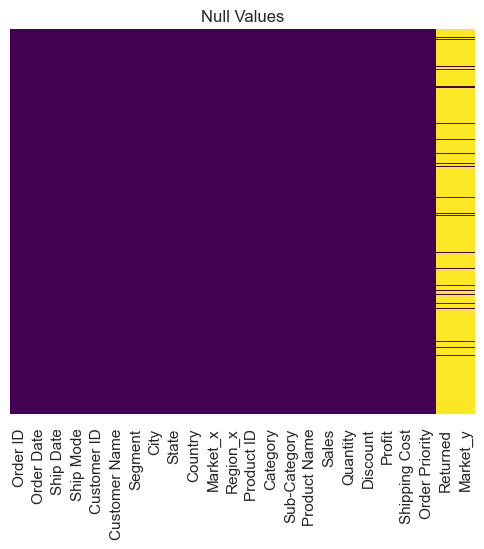

In [47]:
sns.heatmap(fsc.isnull(),yticklabels = False, cbar = False, cmap = 'viridis')
plt.title('Null Values')

In [127]:
fsc.head(5)

,Ship Mode,Segment,City,State,Country,Market_x,Region_x,Product ID,Category,Sub-Category,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Returned,Market_y
0,Same Day,Consumer,New York City,New York,United States,US,East,TEC-AC-10003033,Technology,Accessories,2309,7,0.0,762,933,Critical,No,NaN
1,Second Class,Corporate,Wollongong,New South Wales,Australia,APAC,Oceania,FUR-CH-10003950,Furniture,Chairs,3709,9,0.1,-288,923,Critical,Yes,APAC
2,First Class,Consumer,Brisbane,Queensland,Australia,APAC,Oceania,TEC-PH-10004664,Technology,Phones,5175,9,0.1,919,915,Medium,No,NaN
3,First Class,Home Office,Berlin,Berlin,Germany,EU,Central,TEC-PH-10004583,Technology,Phones,2892,5,0.1,-96,910,Medium,No,NaN
4,Same Day,Consumer,Dakar,Dakar,Senegal,Africa,Africa,TEC-SHA-10000501,Technology,Copiers,2832,8,0.0,311,903,Critical,No,NaN


**After analysing the data I found that inside Returned column in some rows its object with ('Yes') and the rest of that is blank. So, We can resolve this by adding No values inside the returned column in the place of NaN**

In [49]:
def impute_Returned(cols):
    Returned = cols.iloc[0]  
    if pd.isnull(Returned):
        return 'No'
    else:
        return Returned
fsc['Returned'] = fsc[['Returned']].apply(impute_Returned, axis=1)

In [50]:
pd.isnull(fsc).sum()

Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Market_x              0
Region_x              0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
Returned              0
Market_y          48206
dtype: int64

In [51]:
fsc.head(1)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Returned,Market_y
0,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,United States,...,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.65,7,0.0,762.1845,933.57,Critical,No,NaN


**So, here we finished Data Modeling and Data Manipulation(NO Blank values and columns are left to add)**

**Let's Begin Sales_analysis**

<h2>Exploratory Data Analysis</H2>

**For going Further we need to drop some unwanted columns which do not make any sense to do sales analysis in my point of view**

**Sorry I have deleted already and ran program two times**

In [52]:
sales = fsc.drop(['Order ID','Ship Date','Order Date','Customer ID','Customer Name','Product Name'],axis = 1 , inplace = True)

In [53]:
fsc.head()

,Ship Mode,Segment,City,State,Country,Market_x,Region_x,Product ID,Category,Sub-Category,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Returned,Market_y
0,Same Day,Consumer,New York City,New York,United States,US,East,TEC-AC-10003033,Technology,Accessories,2309.650,7,0.0,762.1845,933.57,Critical,No,NaN
1,Second Class,Corporate,Wollongong,New South Wales,Australia,APAC,Oceania,FUR-CH-10003950,Furniture,Chairs,3709.395,9,0.1,-288.7650,923.63,Critical,Yes,APAC
2,First Class,Consumer,Brisbane,Queensland,Australia,APAC,Oceania,TEC-PH-10004664,Technology,Phones,5175.171,9,0.1,919.9710,915.49,Medium,No,NaN
3,First Class,Home Office,Berlin,Berlin,Germany,EU,Central,TEC-PH-10004583,Technology,Phones,2892.510,5,0.1,-96.5400,910.16,Medium,No,NaN
4,Same Day,Consumer,Dakar,Dakar,Senegal,Africa,Africa,TEC-SHA-10000501,Technology,Copiers,2832.960,8,0.0,311.5200,903.04,Critical,No,NaN


**Now, let's make combinations to analyze effectivily**

In [54]:
fsc.describe()

,Sales,Quantity,Discount,Profit,Shipping Cost
count,51254.000000,51254.000000,51254.000000,51254.000000,51254.000000
mean,246.486198,3.477114,0.142964,28.585183,26.379796
std,487.534123,2.278909,0.212323,174.327904,57.308941
min,0.444000,1.000000,0.000000,-6599.978000,0.002000
25%,30.758625,2.000000,0.000000,0.000000,2.610000
50%,85.056000,3.000000,0.000000,9.240000,7.790000
75%,251.007500,5.000000,0.200000,36.805250,24.450000
max,22638.480000,14.000000,0.850000,8399.976000,933.570000


In [100]:
fsc.groupby(['Category',],as_index = False)['Quantity'].sum().sort_values(by= 'Quantity',ascending = False)

,Category,Quantity
1,Office Supplies,108122
2,Technology,35155
0,Furniture,34939


Text(0.5, 1.0, 'Most selling products according to their categories')

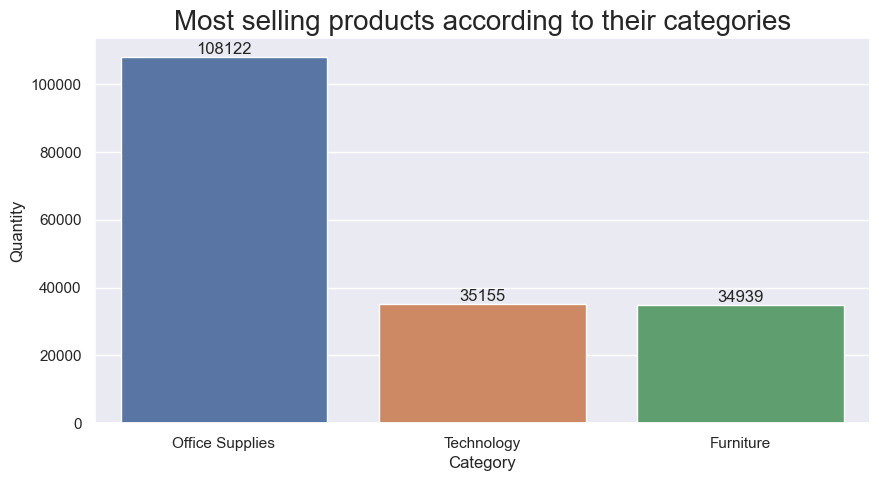

In [103]:
sns.set(rc={'figure.figsize':(10,5)})
data =fsc.groupby(['Category',],as_index = False)['Quantity'].sum().sort_values(by= 'Quantity',ascending = False)
ax = sns.barplot(x='Category',y='Quantity', data= data)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Most selling products according to their categories', fontsize = 20)

Text(0.5, 1.0, 'Most selling products according to their sub-categories & Category')

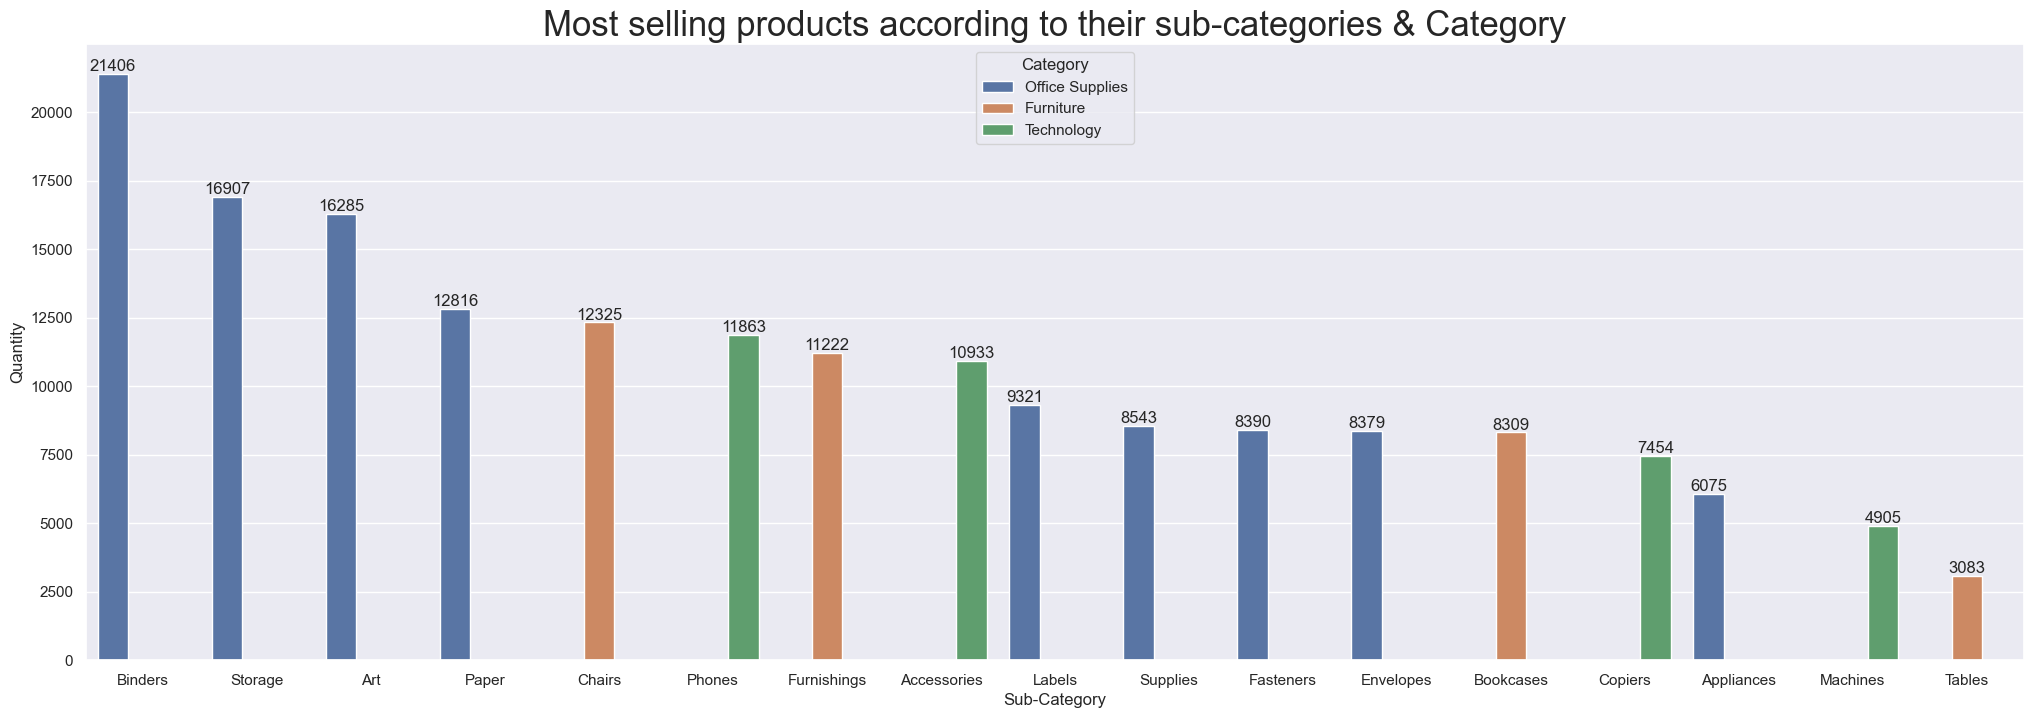

In [106]:
sns.set(rc={'figure.figsize':(25,8)})
data = fsc.groupby(['Category','Sub-Category'],as_index = False)['Quantity'].sum().sort_values(by= 'Quantity',ascending = False)
ax = sns.barplot(x='Sub-Category',y='Quantity',hue = 'Category', data= data)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Most selling products according to their sub-categories & Category', fontsize = 25)

Text(0.5, 1.0, 'Most products according to their Product ID')

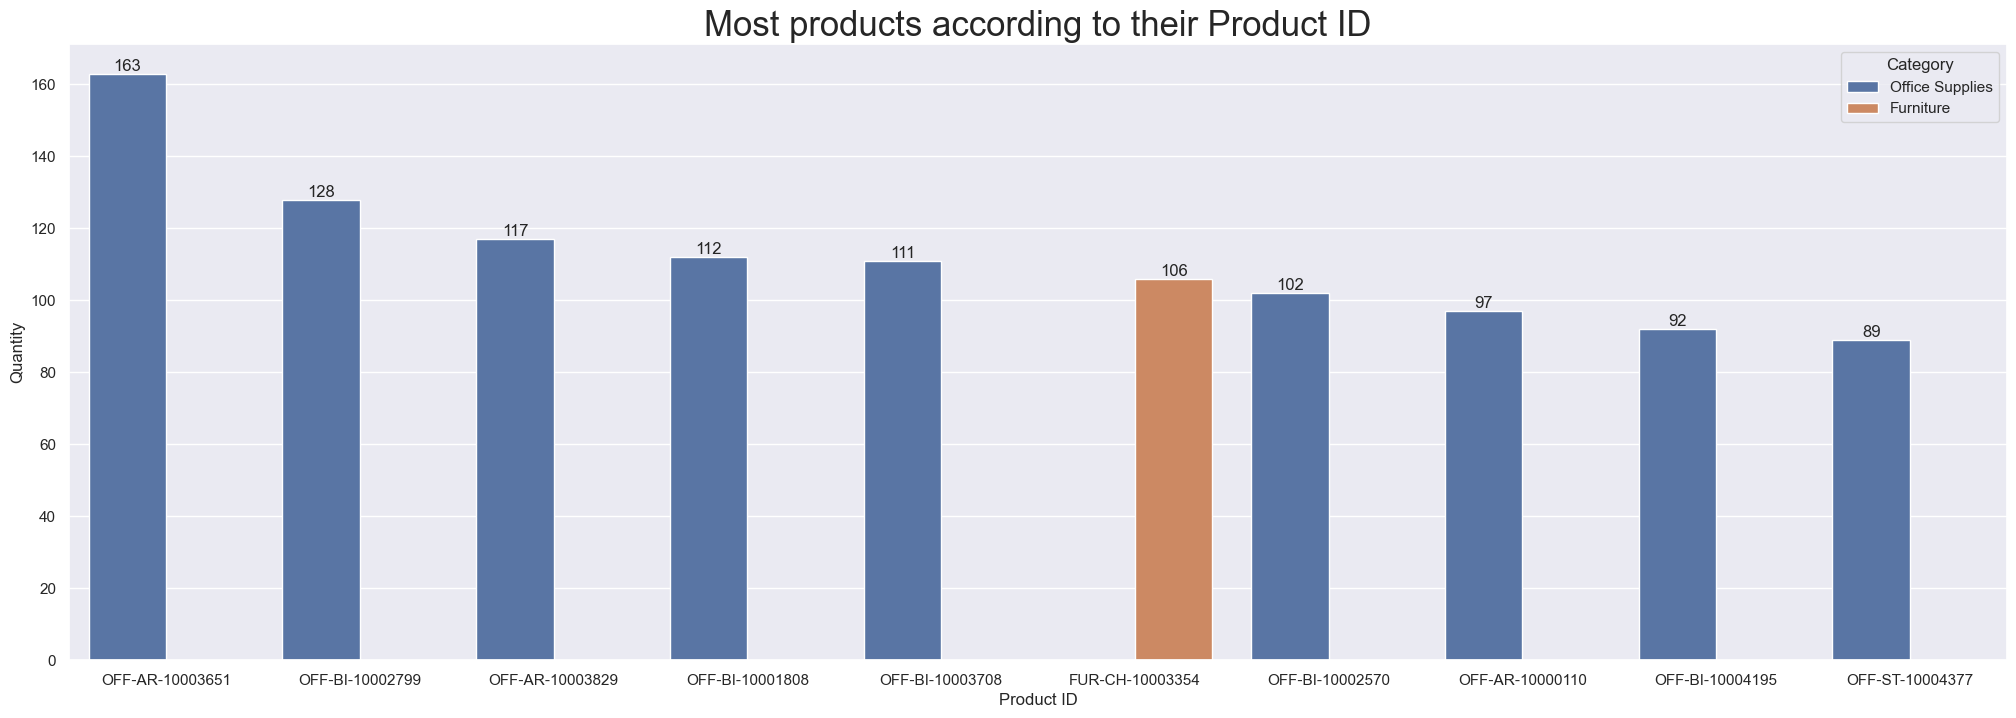

In [109]:
data = fsc.groupby(['Product ID','Category'],as_index = False)['Quantity'].sum().sort_values(by= 'Quantity',ascending = False).head(10)
ax = sns.barplot(x='Product ID',y='Quantity',hue = 'Category', data= data)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Most products according to their Product ID', fontsize = 25)

Text(0.5, 1.0, 'Most products according to their Regions')

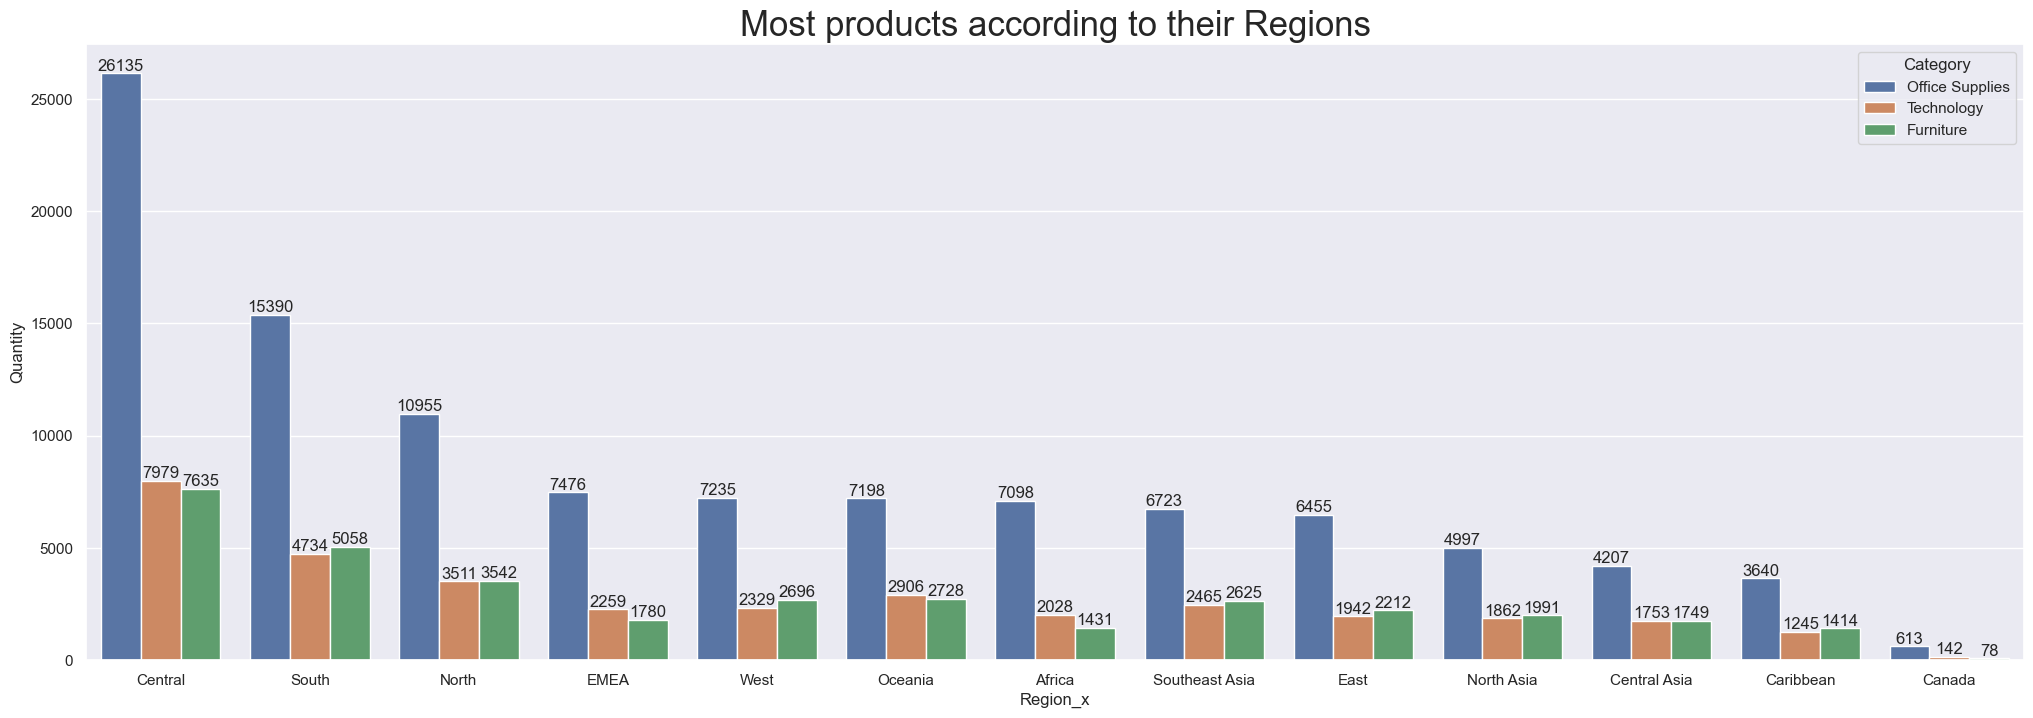

In [113]:
data = fsc.groupby(['Category','Region_x'],as_index = False)['Quantity'].sum().sort_values(by= 'Quantity',ascending = False)
ax = sns.barplot(x='Region_x',y='Quantity',hue = 'Category', data= data)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Most products according to their Regions', fontsize = 25)

**Here we got that the office supplies products sold all over the world the most. According to their Quantities**

**Now, Lets find out the Net profit of the company after analysing the profit, Sales, shipping Cost and  Quantity**

In [88]:
fsc['Sales'] = fsc['Sales'].astype(int)
fsc['Profit'] = fsc['Profit'].astype(int)
fsc['Shipping Cost'] = fsc['Shipping Cost'].astype(int)

In [90]:
fsc.describe()

,Sales,Quantity,Discount,Profit,Shipping Cost
count,51254.000000,51254.000000,51254.000000,51254.000000,51254.000000
mean,245.970402,3.477114,0.142964,28.335291,25.887053
std,487.530683,2.278909,0.212323,174.179856,57.309616
min,0.000000,1.000000,0.000000,-6599.000000,0.000000
25%,30.000000,2.000000,0.000000,0.000000,2.000000
50%,85.000000,3.000000,0.000000,9.000000,7.000000
75%,251.000000,5.000000,0.200000,36.000000,24.000000
max,22638.000000,14.000000,0.850000,8399.000000,933.000000


In [128]:
fsc.head(1)

,Ship Mode,Segment,City,State,Country,Market_x,Region_x,Product ID,Category,Sub-Category,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Returned,Market_y
0,Same Day,Consumer,New York City,New York,United States,US,East,TEC-AC-10003033,Technology,Accessories,2309,7,0.0,762,933,Critical,No,NaN


**To find out Net Profit per unit  and Net Expense per unit we have to gather data from fsc and make a new whole data with sufficient information**

In [132]:
new_data = fsc.drop(['City','Ship Mode','Market_y','Market_x'],axis = 1)
new_data.head(1)

,Segment,State,Country,Region_x,Product ID,Category,Sub-Category,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Returned
0,Consumer,New York,United States,East,TEC-AC-10003033,Technology,Accessories,2309,7,0.0,762,933,Critical,No


**Now add columns with a name of Net_Profit and Net_Expense**

**Net_Expense  = (Sales - Shipping Cost - Profit - Discount) / Quantity**

**Net_Profit   = Profit / Quantity**

In [135]:
new_data['Net_Expense_per_Unit'] = (new_data['Sales'] - new_data['Profit'] - new_data['Shipping Cost'] - new_data['Discount']) / new_data['Quantity']
new_data['Net_Profit_per_Unit'] = new_data['Profit'] / new_data['Quantity']
new_data.head(1)

,Segment,State,Country,Region_x,Product ID,Category,Sub-Category,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Returned,Net_Expense_per_Unit,Net_Profit_per_Unit
0,Consumer,New York,United States,East,TEC-AC-10003033,Technology,Accessories,2309,7,0.0,762,933,Critical,No,87.714286,108.857143


**Now, Let's drop some of the columns from the new_data so we can easily analyze** 

In [141]:
new_data.drop(['Sales','Quantity','Profit','Shipping Cost','Discount'],axis = 1, inplace = True)

In [156]:
new_data.head(1)

,Segment,State,Country,Region_x,Product ID,Category,Sub-Category,Order Priority,Returned,Net_Expense_per_Unit,Net_Profit_per_Unit
0,Consumer,New York,United States,East,TEC-AC-10003033,Technology,Accessories,Critical,No,87,108


In [148]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51254 entries, 0 to 51294
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Segment               51254 non-null  object
 1   State                 51254 non-null  object
 2   Country               51254 non-null  object
 3   Region_x              51254 non-null  object
 4   Product ID            51254 non-null  object
 5   Category              51254 non-null  object
 6   Sub-Category          51254 non-null  object
 7   Order Priority        51254 non-null  object
 8   Returned              51254 non-null  object
 9   Net_Expense_per_Unit  51254 non-null  int32 
 10  Net_Profit_per_Unit   51254 non-null  int32 
dtypes: int32(2), object(9)
memory usage: 4.3+ MB


**Let's Start Analysis**

In [151]:
new_data['Net_Profit_per_Unit'] = new_data['Net_Profit_per_Unit'].astype(int)
new_data['Net_Expense_per_Unit'] = new_data['Net_Expense_per_Unit'].astype(int)

Text(0.5, 1.0, 'Most profit earned from which Region')

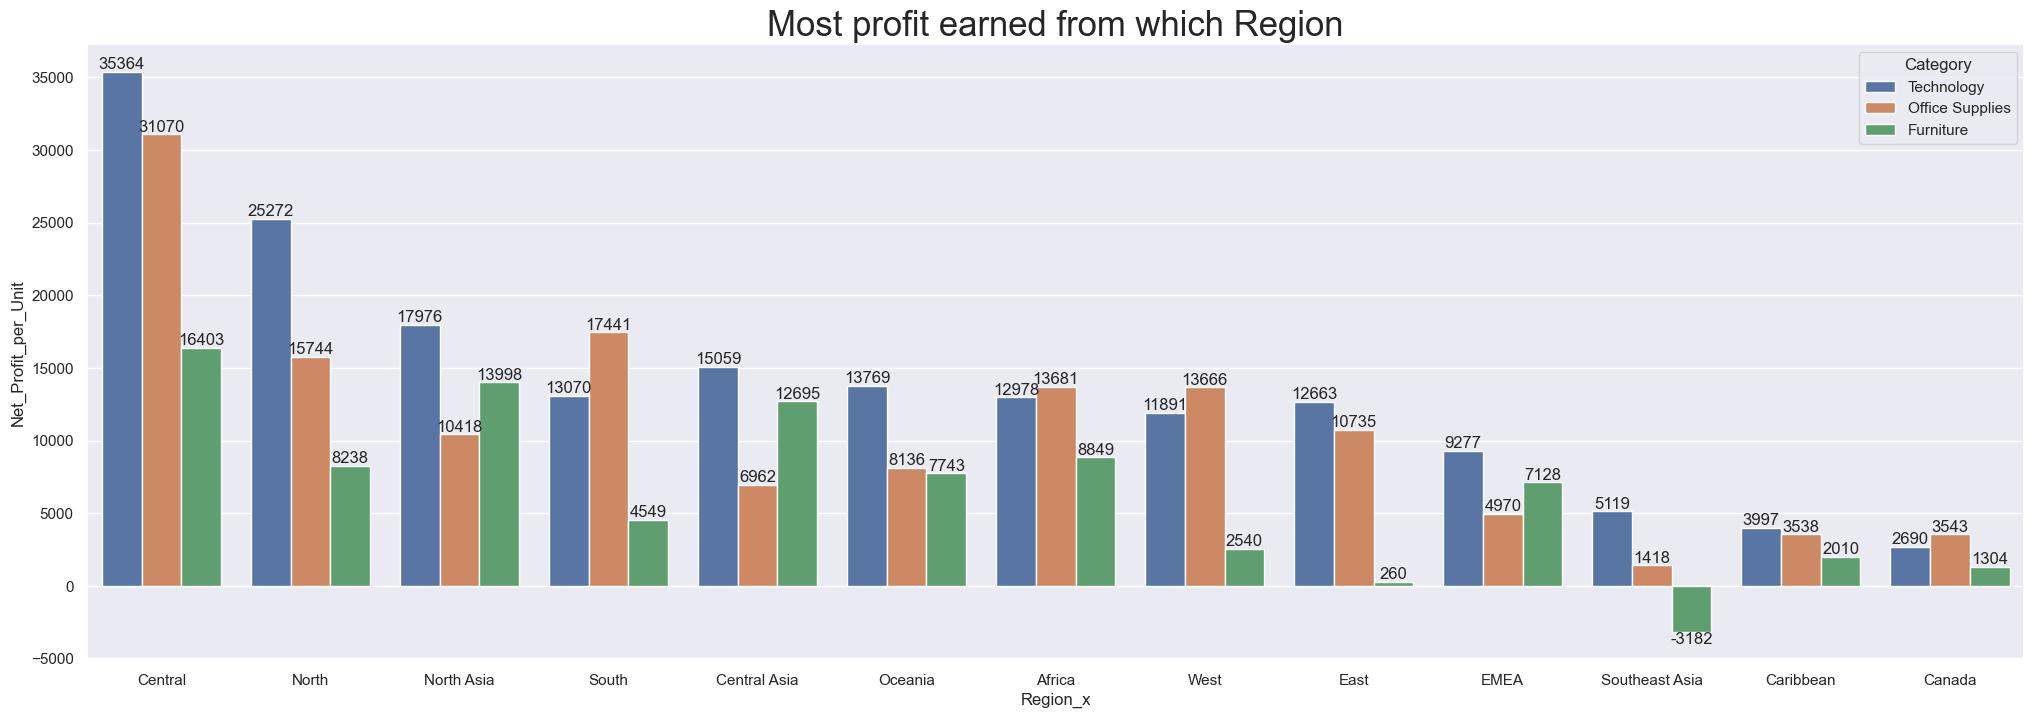

In [168]:
sns.set(rc={'figure.figsize':(25,8)})
new = new_data.groupby(['Category', 'Region_x'], as_index=False)['Net_Profit_per_Unit'].sum().sort_values(by='Net_Profit_per_Unit', ascending=False)
ax = sns.barplot(x='Region_x',y = 'Net_Profit_per_Unit', hue ='Category' , data= new)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Most profit earned from which Region', fontsize = 25)

**Here, we can Identify that the Net_profit earned mostly in Central regions on all over the Product Categories. Apart from that, we also consider the Southeast Asia region for getting loss in Furniture Category. Therefore, We need to stop selling products in  The southeast Asia which are related to Furnitures.
Before that let's find out the specific country where company getting loss.**

Text(0.5, 1.0, 'The Southeast Asia Region Where the most of the losses company faced according to Countries')

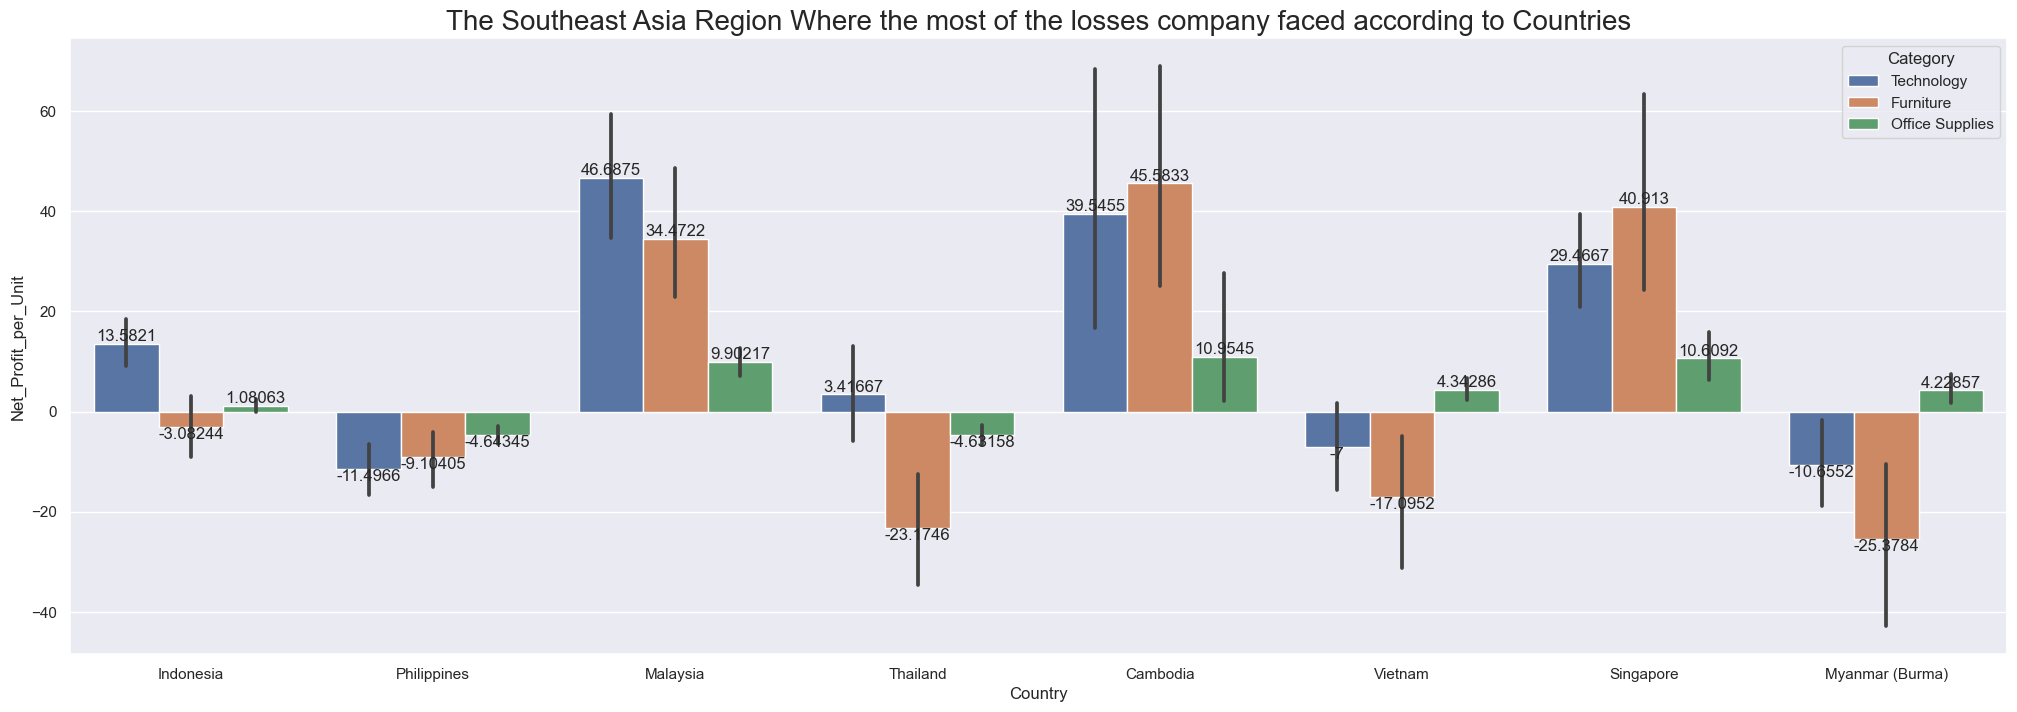

In [184]:
specific_regions = ['Southeast Asia']
filtered_df = new_data[new_data['Region_x'].isin(specific_regions)]
ax = sns.barplot(x = 'Country' , y = 'Net_Profit_per_Unit', hue='Category', data=filtered_df)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('The Southeast Asia Region Where the most of the losses company faced according to Countries', fontsize = 20)

**As we can see above that the countries of Southeast Asia region (Philippines, Vietnam , Thailand and Myanmar(Burma)'s market are affecting the company's image as well as company had to face losses from these Countries. Therefore, To overcome the losses and increase the percentage of profit.Company ought to invest less amount of money in these countries and try to sell other category of data rather than these.**

**Now,Lets analyze the 'Net_Expense_per_Unit' Column to know about the expense of the country**

Text(0.5, 1.0, 'Amount of the investmenet by the Company  according to  Region and category')

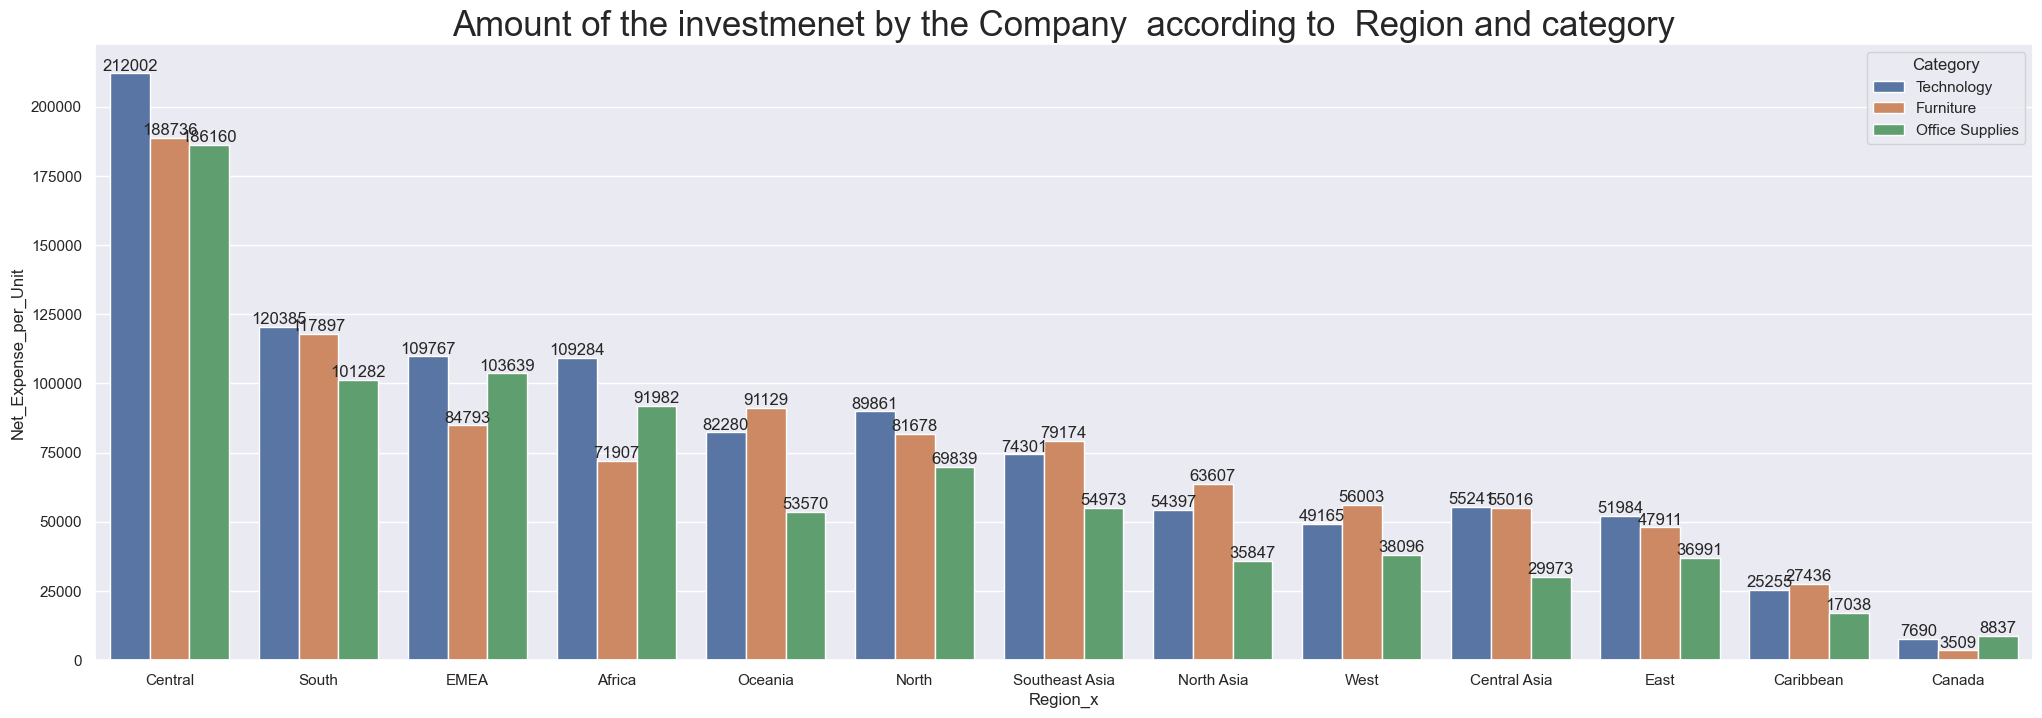

In [193]:
sns.set(rc={'figure.figsize':(25,8)})
new = new_data.groupby(['Category', 'Region_x'], as_index=False)['Net_Expense_per_Unit'].sum().sort_values(by='Net_Expense_per_Unit', ascending=False)
ax = sns.barplot(x='Region_x',y = 'Net_Expense_per_Unit', hue ='Category' , data= new)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Amount of the investmenet by the Company  according to  Region and category', fontsize = 25)

**The best move by the company to invest the maximum no. of amount in the Central Region. However, as we can see our here company invest
a good amount of money in the Southeast Asia Region as compared to Canada and North Asia. Moreover, company still faces the loss issue there. let's check by the company's most investment by countries of southeast asia**

Text(0.5, 1.0, 'The Southeast Asia Region Where the company invest enormous amount according to Countries')

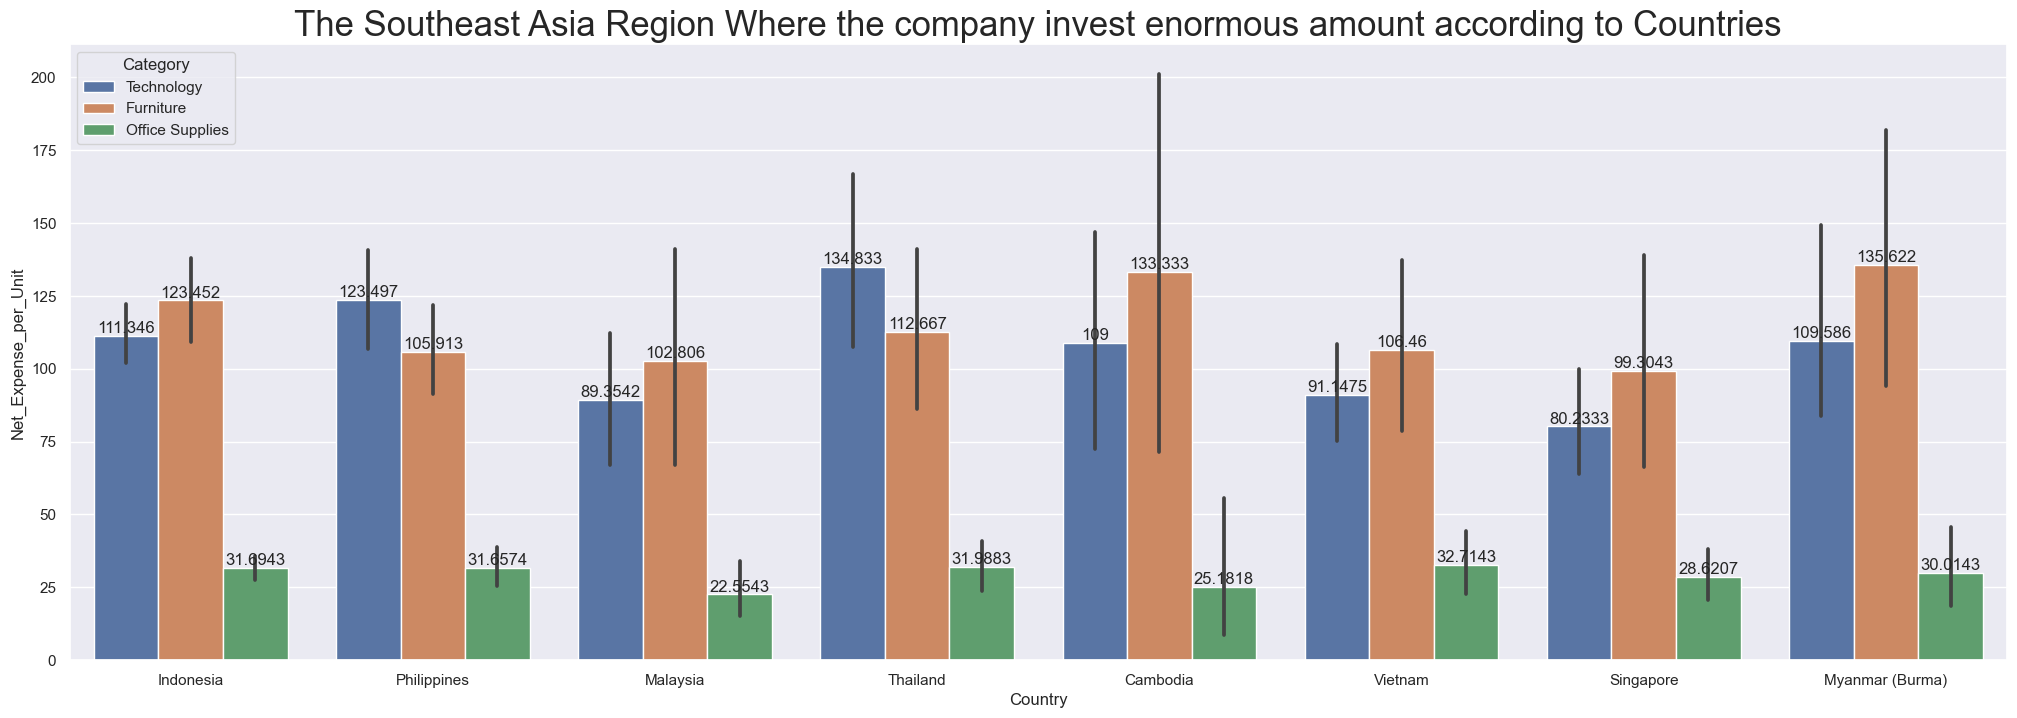

In [194]:
specific_regions = ['Southeast Asia']
filtered_df = new_data[new_data['Region_x'].isin(specific_regions)]
ax = sns.barplot(x = 'Country' , y = 'Net_Expense_per_Unit', hue='Category', data=filtered_df)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('The Southeast Asia Region Where the company invest enormous amount according to Countries', fontsize = 25)

**Here, Finally we can make a conclusion that the company should invest less amount of money in Southeast Asia Region as we can see that company on an average investing 112000 in the Countries ( Thailand, Philippines,Vietnam and Myanmar(Burma)) and Still facing loss. Therefore, It's a high time Strategy should be changed according to the data analysis,**

In [195]:
new_data.head()

,Segment,State,Country,Region_x,Product ID,Category,Sub-Category,Order Priority,Returned,Net_Expense_per_Unit,Net_Profit_per_Unit
0,Consumer,New York,United States,East,TEC-AC-10003033,Technology,Accessories,Critical,No,87,108
1,Corporate,New South Wales,Australia,Oceania,FUR-CH-10003950,Furniture,Chairs,Critical,Yes,341,-32
2,Consumer,Queensland,Australia,Oceania,TEC-PH-10004664,Technology,Phones,Medium,No,371,102
3,Home Office,Berlin,Germany,Central,TEC-PH-10004583,Technology,Phones,Medium,No,415,-19
4,Consumer,Dakar,Senegal,Africa,TEC-SHA-10000501,Technology,Copiers,Critical,No,202,38


**Now, Let's Analyze the data of Segment so that we can find where should more money for getting high profit**

Text(0.5, 1.0, 'Segment Vs Product Category')

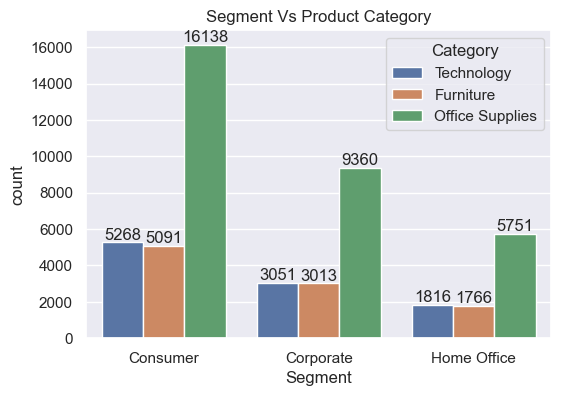

In [201]:
ax = sns.countplot(x ='Segment', hue = 'Category', data = new_data)['Net_Profit_per_Unit'].sum().
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Segment Vs Product Category')

Text(0.5, 1.0, 'Product sold Profit vs Segments according Regions')

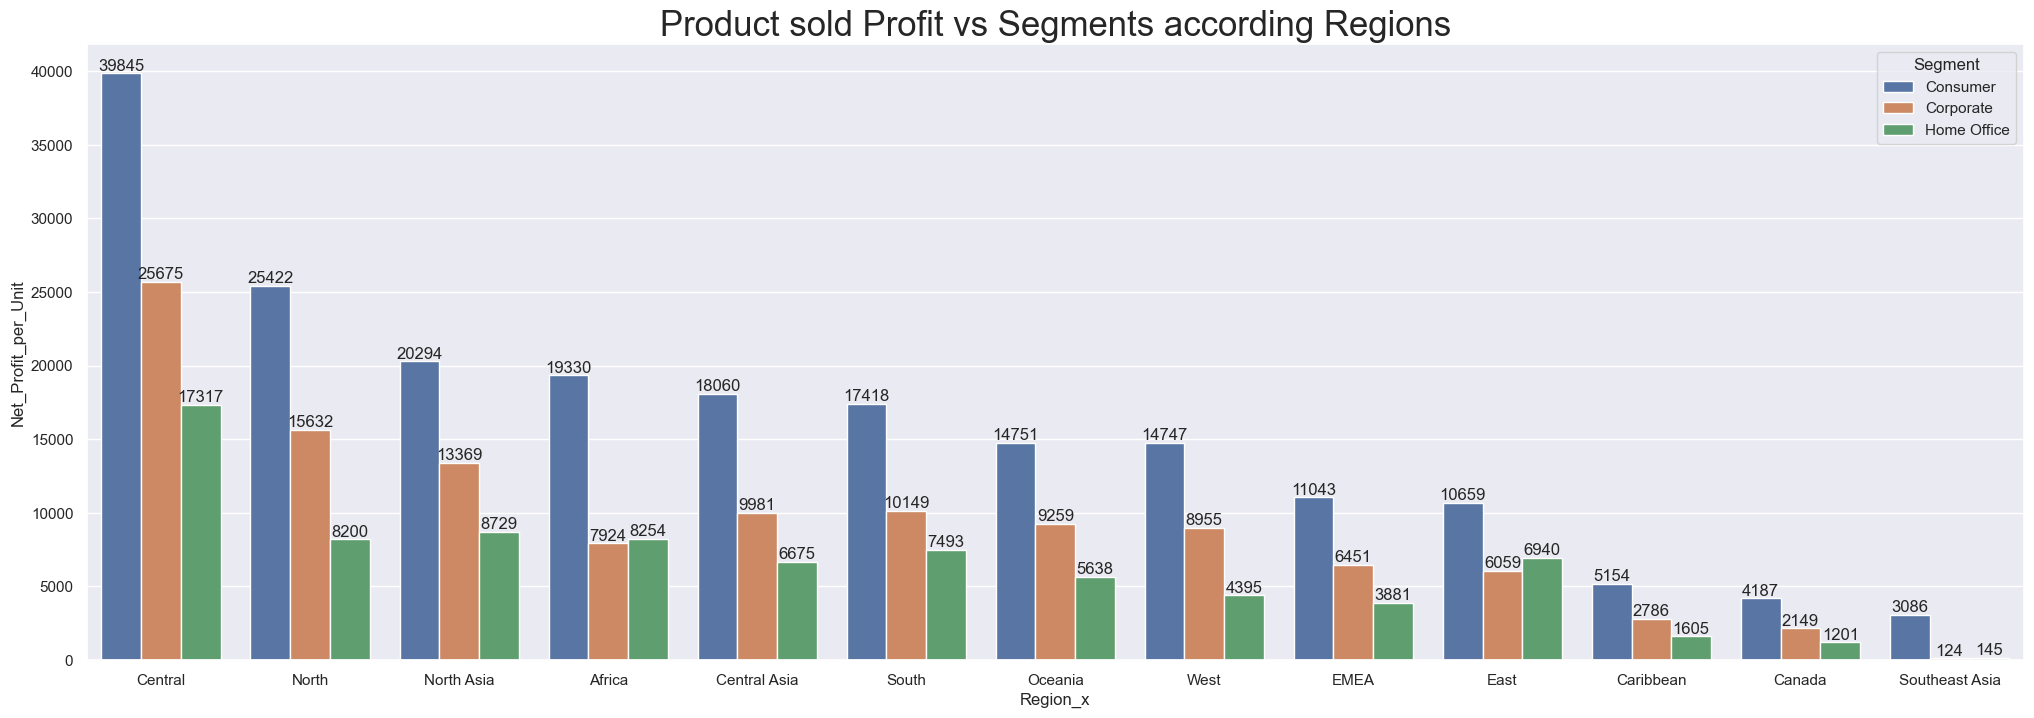

In [210]:
new = new_data.groupby(['Segment','Region_x'], as_index=False)['Net_Profit_per_Unit'].sum().sort_values(by='Net_Profit_per_Unit', ascending=False)
ax = sns.barplot(x='Region_x',y = 'Net_Profit_per_Unit', hue ='Segment' , data= new)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Product sold Profit vs Segments according Regions', fontsize = 25)

Text(0.5, 1.0, 'Product sold (Expense of company) vs Segments according Regions')

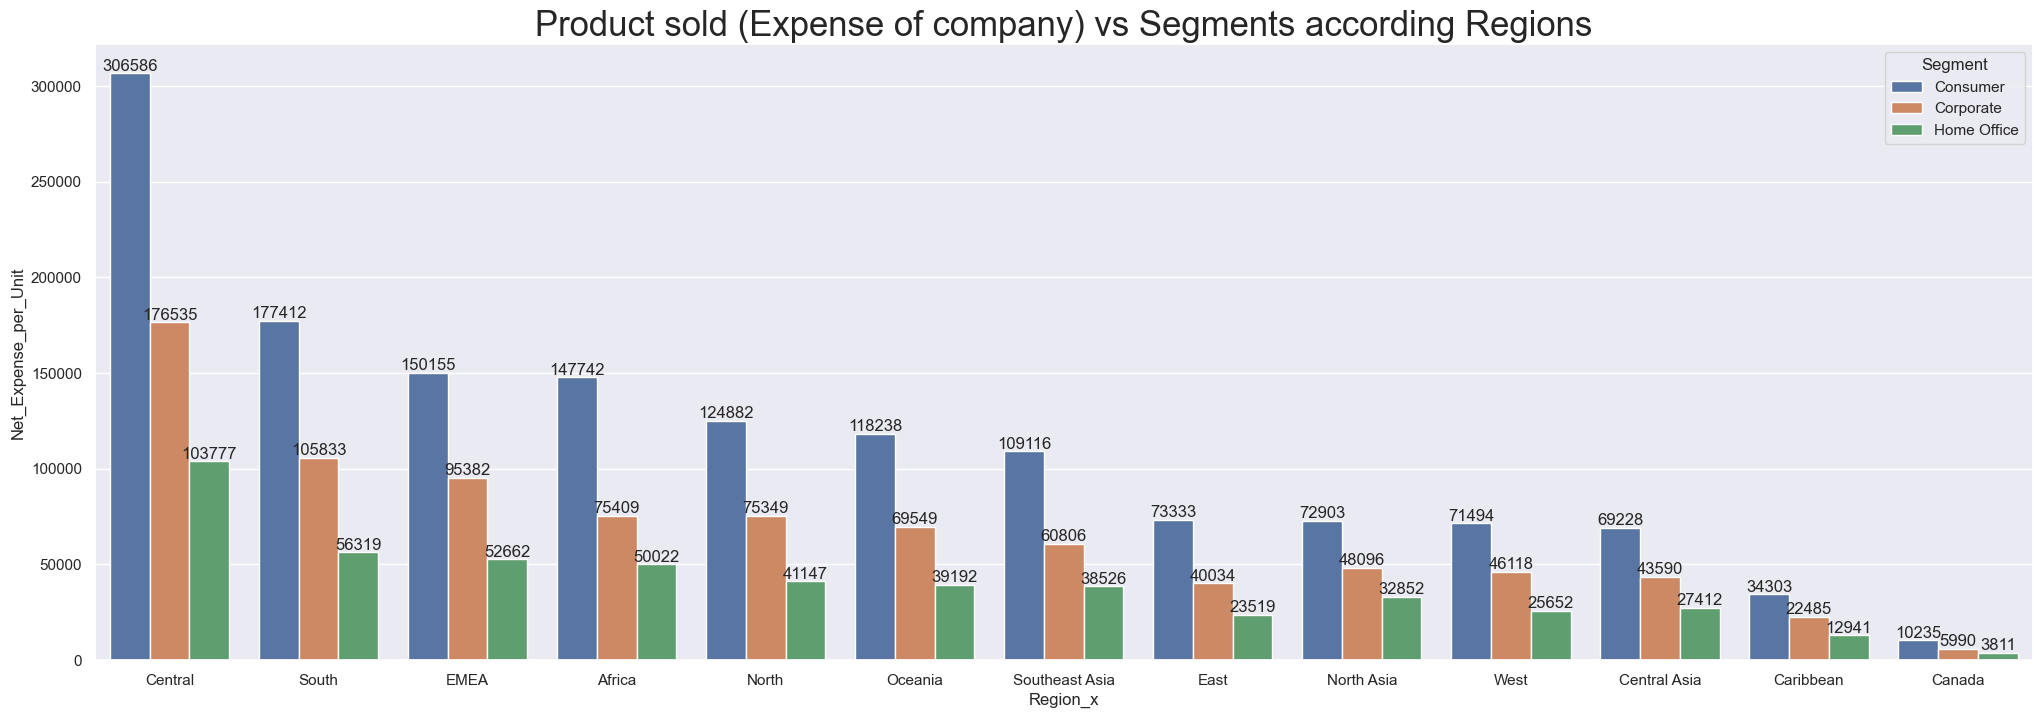

In [211]:
new = new_data.groupby(['Segment','Region_x'], as_index=False)['Net_Expense_per_Unit'].sum().sort_values(by='Net_Expense_per_Unit', ascending=False)
ax = sns.barplot(x='Region_x',y = 'Net_Expense_per_Unit', hue ='Segment' , data= new)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Product sold (Expense of company) vs Segments according Regions', fontsize = 25)

**Again the company's investment on southeast asia won't be great move according the net profit company should less invest these region.**

**Moreover, we can make a conclusion over here that consumer segment is returning us much more profit in all measures**

Text(0.5, 1.0, 'Difference between Returned Order and Non Returned Order')

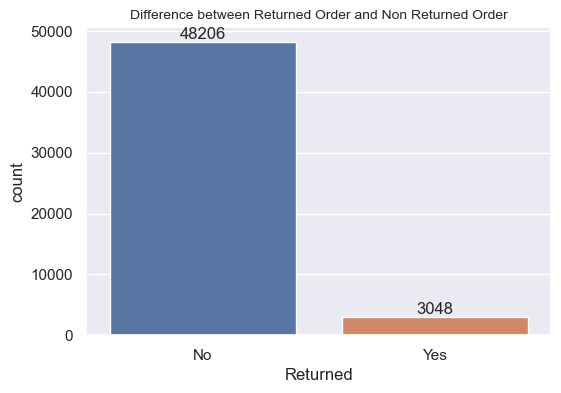

In [196]:
sns.set(rc={'figure.figsize':(6,4)})
ax = sns.countplot(x='Returned', data= fsc)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Difference between Returned Order and Non Returned Order', fontsize = 10)

**Lets find out top 10 products which were returned most of the time by the buyers**

Text(0.5, 1.0, 'Top 10 Product ID which were returned : most of the time by the Buyers')

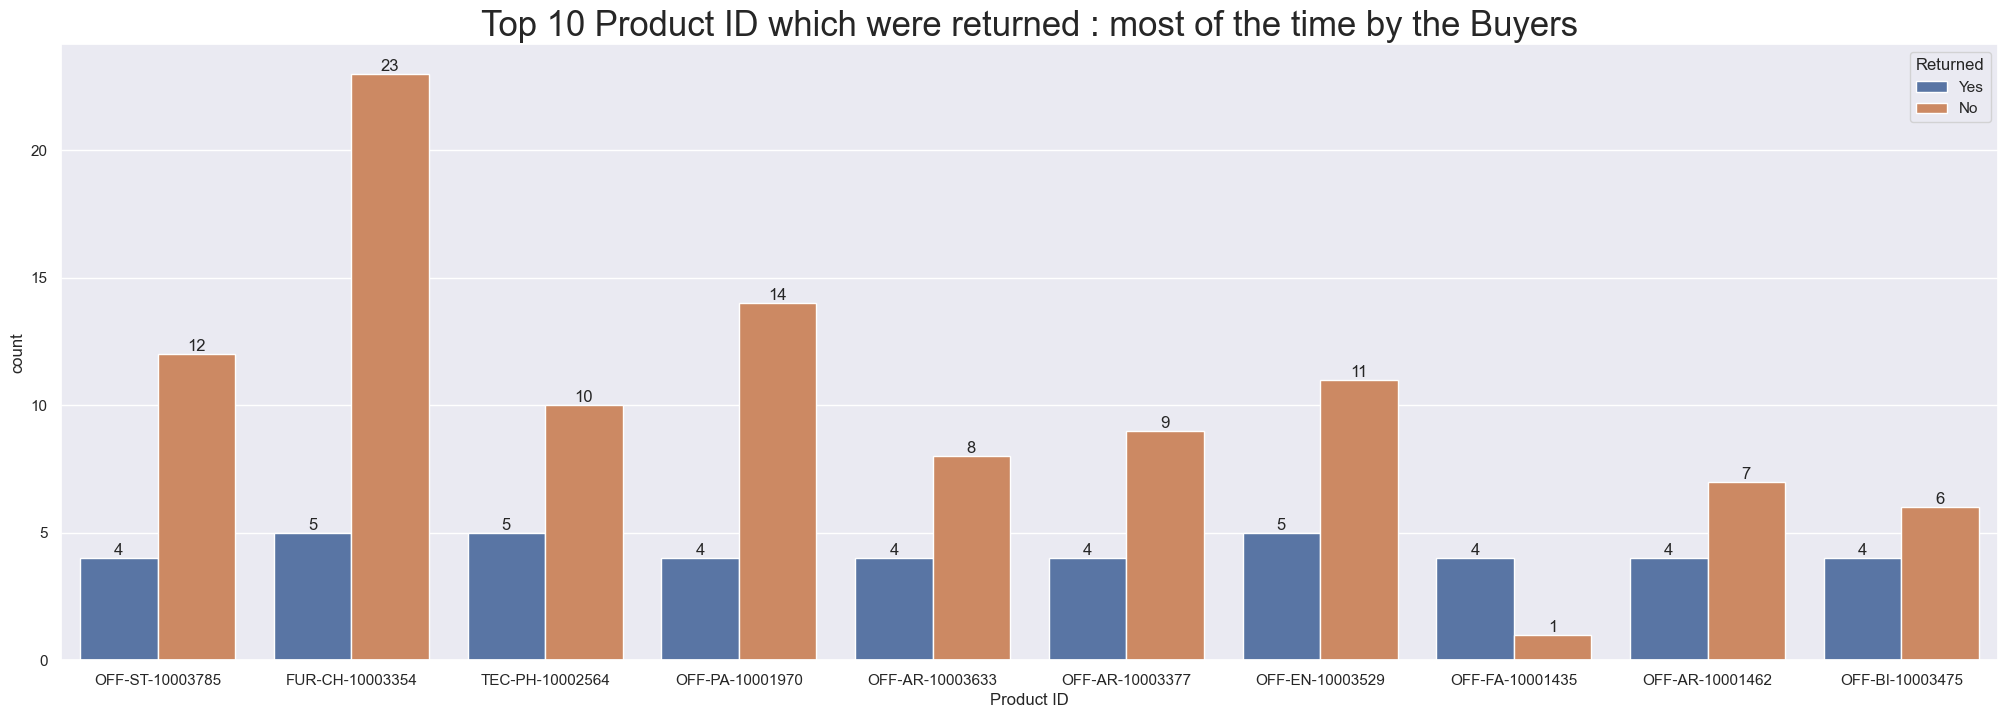

In [81]:
returns_buy_product = fsc[fsc['Returned'] == 'Yes'].groupby('Product ID').size().nlargest(10)
top_10_returns = fsc[fsc['Product ID'].isin(returns_buy_product.index)]
ax = sns.countplot(x='Product ID', hue='Returned', hue_order=['Yes', 'No'], data=top_10_returns)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Top 10 Product ID which were returned : most of the time by the Buyers', fontsize = 25)

**Let's Find out the top 10 product ID's categories and Subcategories**

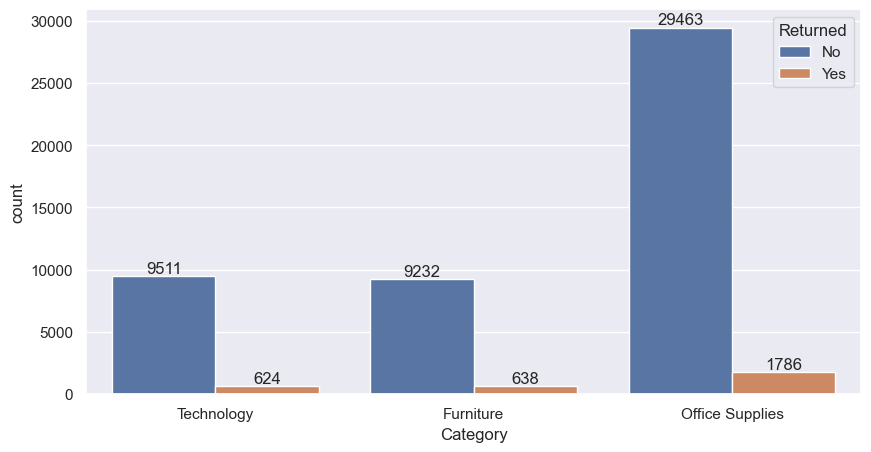

In [75]:
returns_buy_product = fsc[fsc['Returned'] == 'Yes'].groupby('Category').size().nlargest(10)
top_10_returns = fsc[fsc['Category'].isin(returns_buy_product.index)]
sns.set(rc={'figure.figsize':(10,5)})
ax = sns.countplot(x='Category', hue='Returned', data=top_10_returns)
for bars in ax.containers:
    ax.bar_label(bars)

**According to the data, products which were returned by buyers are mostly from office-supplies. However, We should not do anything with that because the sales of office Supplies are also high. So it's better to change region instead of thinking about the product.** 

Text(0.5, 1.0, 'According to Region: Which Region returns order most')

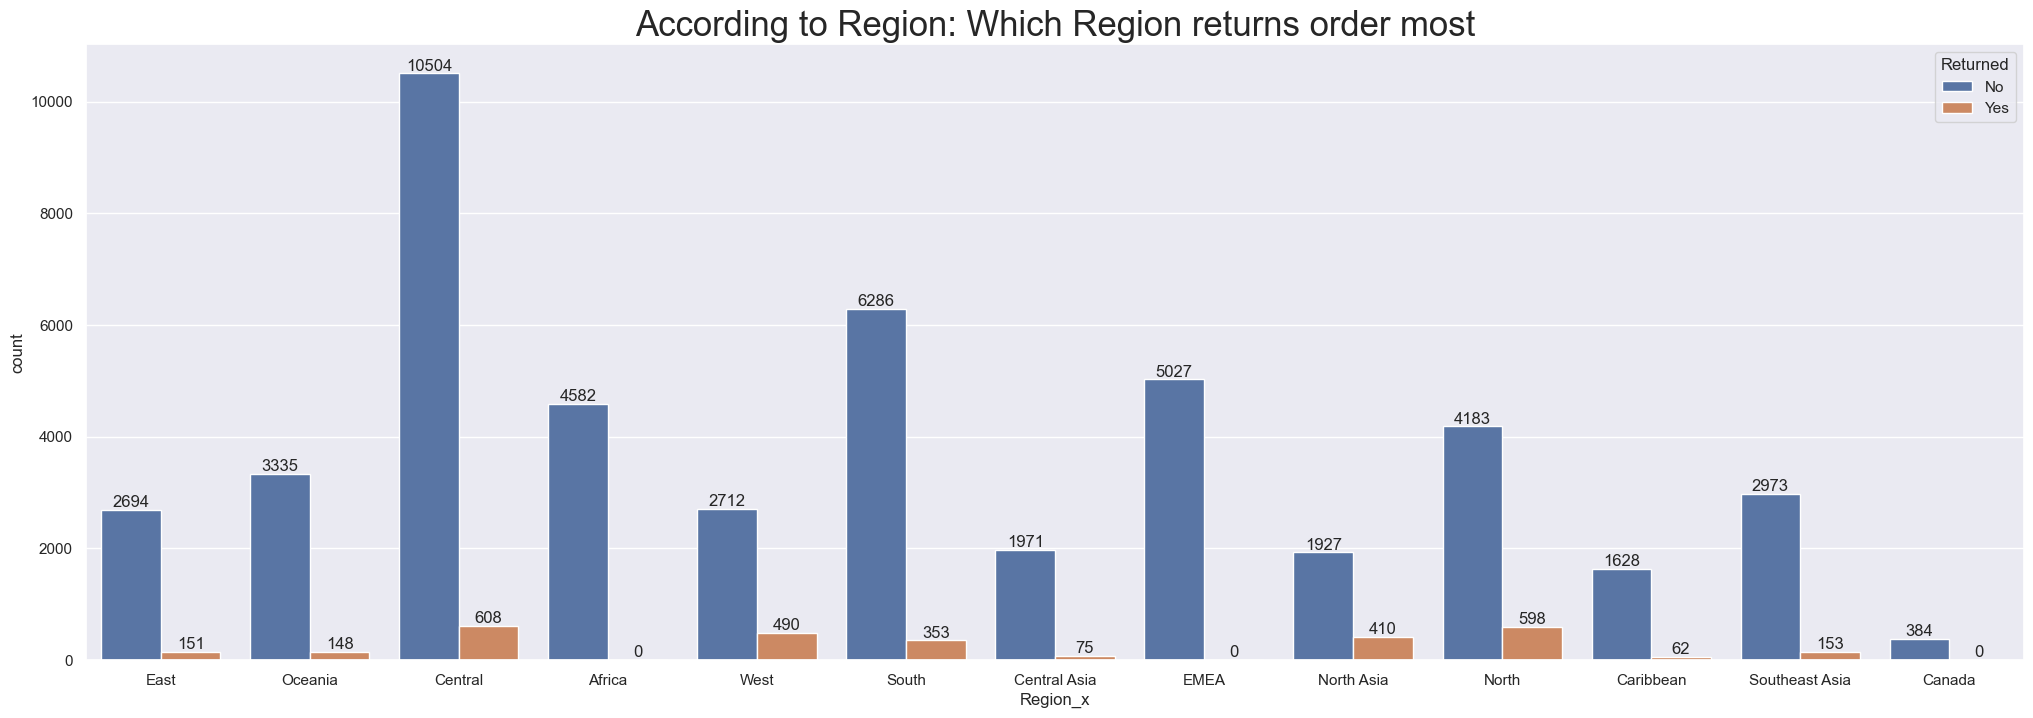

In [207]:
sns.set(rc={'figure.figsize':(25,8)})
ax = sns.countplot(x='Region_x', hue = 'Returned', data= fsc)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('According to Region: Which Region returns order most', fontsize = 25)

**Over here we can see that the regions where the most products were returned from are Central, West, North Asia and North. However, We have to noticed here that Central non-returned order ratio and returned order (50:3) is great as compared to West(27:5), North Asia(19:4) and North(41:6). So, We should not consider Central region here.**

**Note- All Ratios are approximate values**

Text(0.5, 1.0, 'Countries from the West, North, and North Asia that Returned Orders Most')

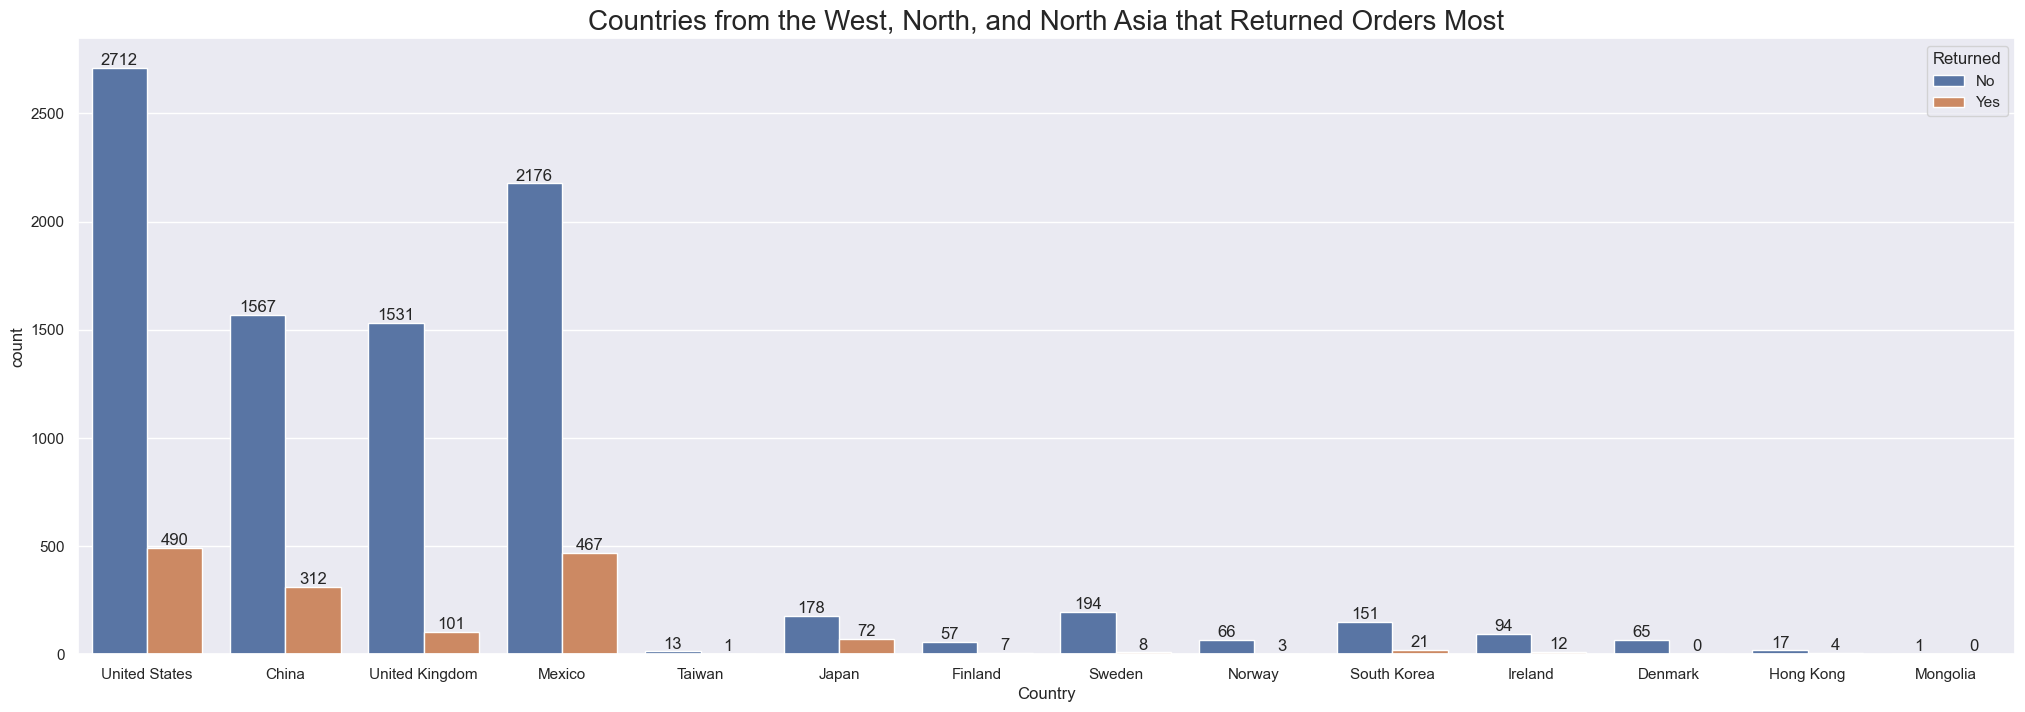

In [202]:
specific_regions = ['North', 'North Asia', 'West']
filtered_df = fsc[fsc['Region_x'].isin(specific_regions)]
ax = sns.countplot(x = 'Country' , hue='Returned', data=filtered_df)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Countries from the West, North, and North Asia that Returned Orders Most', fontsize = 20)

**Here, we got that Office supplies product were mostly returned by Japan, and this country belongs to North Asia. here we should less invest companies budget in The North Asia Region and mainly in Japan. Specifically for the products which is related to the office Supplies products**

**Bonus Move which company should use for it's sales strategy**

In [227]:
most_recurring_customer = df['Customer Name'].value_counts().idxmax()

customer_df = df[df['Customer Name'] == most_recurring_customer]

num_orders = customer_df['Order ID'].nunique()

customer_id = customer_df['Customer ID'].iloc[0]
print("Customer Name:", most_recurring_customer)
print("Customer ID:", customer_id)
print("Number of Orders:", num_orders)

banner = f"Congratulations {most_recurring_customer}! You're our most loyal customer. company will gonna gift you a FREE HAWAI's TRIP!"

banner_length = len(banner)
print("$" * banner_length)
print(banner)
print("$" * banner_length)

Customer Name: Muhammed Yedwab
Customer ID: MY-18295
Number of Orders: 39
$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
Congratulations Muhammed Yedwab! You're our most loyal customer. company will gonna gift you a FREE HAWAI's TRIP!
$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$


<h1>Conclusion</h1>

**In summary, our data cleaning and analysis reveal valuable insights for the company's strategy. We identified significant missing postal codes, prompting their removal. While office supplies dominate sales globally, the Southeast Asia region experiences losses, particularly in furniture categories. It's prudent to reduce investment in countries like Thailand, Philippines, Vietnam, and Myanmar (Burma) to improve profitability. Central regions show promise for increased investment, yielding higher net profits. However, we observe high return rates in several regions, notably in office supplies. To mitigate losses, reevaluating investment in North Asia, especially Japan, for office supplies is recommended. Overall, focusing on profitable regions and product categories while addressing return rates can optimize the company's performance and profitability.**

**As a bonus move, the company could offer a Hawaiian trip to its most valuable customer, who consistently places the highest number of orders. By analyzing the data, identify the customer with the highest order frequency and reward them with this exclusive trip. This gesture not only appreciates the customer's loyalty but also incentivizes continued patronage. It fosters a positive relationship with the customer, potentially leading to further business opportunities through word-of-mouth promotion and continued patronage.**